In the following exercise, we'll work with the Indian Liver Patient Dataset from the Kaggle.
In this exercise, we'll instantiate three classifiers and different decidion tree algorithms to predict whether a patient suffers from a liver disease using all the features present in the dataset.

The classes are LogisticRegression, DecisionTreeClassifier, and KNeighborsClassifier u.  

In [57]:
# Import function to compute accuracy
from sklearn.metrics import accuracy_score

# Import function to split data
from sklearn.model_selection import train_test_split
# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
import pandas as pd
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Indian Liver Patient Dataset (ILPD).csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
age                 583 non-null int64
gender              583 non-null object
tot_bilirubin       583 non-null float64
direct_bilirubin    583 non-null float64
tot_proteins        583 non-null int64
albumin             583 non-null int64
ag_ratio            583 non-null int64
sgpt                583 non-null float64
sgot                583 non-null float64
alkphos             579 non-null float64
is_patient          583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [4]:
data.shape

(583, 11)

In [5]:
data.columns

Index(['age', 'gender', 'tot_bilirubin', 'direct_bilirubin', 'tot_proteins',
       'albumin', 'ag_ratio', 'sgpt', 'sgot', 'alkphos', 'is_patient'],
      dtype='object')

In [6]:
data.gender=data.gender.map(lambda x: 0 if x == 'Male' else 1) 

In [7]:
data.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64

In [8]:
data.alkphos.fillna(data.alkphos.mean(),inplace=True)

In [9]:
y = data.is_patient.values

In [10]:
data.is_patient.value_counts()

1    416
2    167
Name: is_patient, dtype: int64

In [11]:
data.is_patient.value_counts(normalize=True)
#Since the data is not balanced((71% to 21% ), we need to use Smote technnique solve the issue

1    0.713551
2    0.286449
Name: is_patient, dtype: float64

In [12]:
X = data.drop('is_patient',axis=1)


In [13]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xs=ss.fit_transform(X)


In [14]:
from collections import Counter
from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve,auc,accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import numpy as np


In [15]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y,test_size = .2,random_state=12)

In the following exercises we'll revisit the Indian Liver Patient dataset which was introduced in a previous chapter. Our task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. In addition, given that this dataset is imbalanced, we'll be using the ROC AUC score as a metric instead of accuracy.

In [16]:
sm = SMOTE(random_state=12, ratio = 1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

C:\Users\samra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [17]:
unique, counts = np.unique(y_train, return_counts=True)
print(unique)
print(counts)
y_train.shape
baseline2= counts/(counts*2)
print('baseline:',baseline2 )

[1 2]
[328 328]
baseline: [0.5 0.5]


# Hyperparameters

Since the data is imbalanced, we may need to use GRIDsearch to find the best measurements

### Decision Tree

In [44]:
from sklearn.model_selection import GridSearchCV
dt1 = DecisionTreeClassifier(random_state=SEED)

#Define the grid of hyperparameters 'params_dt'
params_dt = {
                     'max_depth': [3, 4,5, 6],
                     'min_samples_leaf': [0.04, 0.06, 0.08],
                     'max_features': [0.2, 0.4,0.6, 0.8]
                     }
# Instantiate a 10-fold CV grid search object 'grid_dt'
#grid_dt = GridSearchCV (estimator=dt1,  param_grid=params_dt, scoring='accuracy', cv=10, n_jobs=-1)            
                              
grid_dt = GridSearchCV (estimator=dt1,  param_grid=params_dt,cv=10, n_jobs=-1) 
                               
grid_dt.fit(X_test,y_test)
y_pred=grid_dt.predict(X_test)
# Extract best model from 'grid_dt'
grid_dt.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=0.4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.04, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [45]:
grid_dt.best_params_

{'max_depth': 3, 'max_features': 0.4, 'min_samples_leaf': 0.04}

In [46]:
dt_h = DecisionTreeClassifier(max_depth= 3, max_features= 0.4, min_samples_leaf= 0.04,criterion='gini', random_state=SEED)

In [47]:
dt_h.fit(X_train,y_train)    
# Predict y_pred
y_pred = dt_h.predict(X_test)
# Calculate accuracy
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred,pos_label=2)#pos_label when the patient is not sick
accuracy_ROC= auc(fp_rate, tp_rate,'\n')
# Evaluate clf's accuracy on the test set
print('{:s} : {:.3f}'.format(clf_name, accuracy_ROC))    

Classification Tree : 0.670


A little bit improvement in Roc score, but Logistics seems still win.
We may to do the Grid search for Logistics regression as well to see if we can get a better ROC score. 

### Logistic Regression

In [48]:
# Set up the parameters. Looking at C regularization strengths on a log scale.
# This takes awhile...
from sklearn.model_selection import GridSearchCV
gs_params = {
    'penalty':['l1','l2'],
    'solver':['liblinear'],
    'C':np.logspace(-5,0,100)
}

lr_gridsearch = GridSearchCV(LogisticRegression(), gs_params, cv=5, verbose=1)
lr_gridsearch.fit(X_train, y_train)

# best score on the training data:
lr_gridsearch.best_score_
# best parameters on the training data:
lr_gridsearch.best_params_
# Ridge was chosen: this indicates that multicolinerity is an issuesb
# assign the best estimator to a variable:
best_lr = lr_gridsearch.best_estimator_
best_lr

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.2s finished


LogisticRegression(C=0.10974987654930568, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [49]:
lr_ideal =LogisticRegression(C=0.10974987654930568, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2',solver='liblinear', tol=0.0001, verbose=0, warm_start=False,random_state=SEED)

In [50]:
lr_ideal.fit(X_train,y_train)    
# Predict y_pred
y_pred_lr = lr_ideal.predict(X_test)
# Calculate accuracy
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred,pos_label=2)#pos_label when the patient is not sick
accuracy_ROC_lr= auc(fp_rate, tp_rate,'\n')
# Evaluate lr's accuracy on the test set
print('accuracy_lr {:.3f}'.format(accuracy_ROC_lr))

accuracy_lr 0.670


### KNN

In [61]:
# define the parameter values that should be searched
k_range = list(range(1, 31))
# we create a list
weight_options = ['uniform', 'distance']
# dictionary = dict(key=values, key=values)
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)
#instantiate and fit the grid
# exhaustive grid-search because it's trying every combination
# 10-fold cross-validation is being performed 30 x 2 = 60 times

grid_knn = GridSearchCV(KNN(), param_grid, cv=10, )
grid_knn.fit(X_train, y_train)
grid_knn.best_params_
grid_knn.best_estimator_

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

The value of k is 1 may lead to overfitting, so we may need to do the cross validation to find the bette value for k

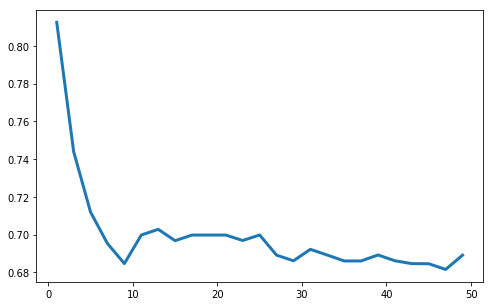

In [63]:
k_values = list(range(1,50,2))
accs = []
for k in k_values:
    knn = KNN(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10)
    accs.append(np.mean(scores))
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(k_values, accs, lw=3)
plt.show()


In [64]:
print('mean of the scores',np.mean(scores))
#So, probabaly 0.7 with k=9 can be a beeter value

mean of the scores 0.6891098484848485


Now, let's try to compare the results 

In [67]:
# Set seed for reproducibility
SEED=1

#Instantiate a Logistic Regression classifier and assign it to lr.
lr =LogisticRegression(C=0.10974987654930568, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', solver='liblinear', tol=0.0001, verbose=0, warm_start=False,random_state=SEED)
#Instantiate a KNN classifier that considers 27 nearest neighbors and assign it to knn.
knn = KNN(algorithm='auto', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')
#Instantiate a Decision Tree Classifier with the parameter min_samples_leaf set to 0.13(so each leaf includes 13% of data used in traing) and assign it to dt.
dt = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=0.4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.04, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, 
            splitter='best', random_state=SEED)
# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

In [68]:
#*we will use ROC to check the accuracy, since the datset was imbalance we cant use accuracy as a measurement
#Iterate over the tuples in classifiers. Use clf_name and clf as the for loop variables:
for clf_name, clf in classifiers:
# Fit clf to the training set
    clf.fit(X_train,y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    # Calculate accuracy
    fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred,pos_label=2)#pos_label when the patient is not sick
    accuracy_ROC= auc(fp_rate, tp_rate,'\n')
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy_ROC))    

Logistic Regression : 0.698
K Nearest Neighbours : 0.635
Classification Tree : 0.670


Results for logistics and Classification are better than KNN



In [69]:
#Finally, you'll evaluate the performance of a voting classifier that takes the outputs of the models defined in the list classifiers and assigns labels by majority voting.
# Import VotingCLassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)


# Calculate roc_curve
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred,pos_label=2)
accuracy_ROC= auc(fp_rate, tp_rate,'\n')
# Evaluate Voting Classifier's accuracy on the test set
print('Voting Classifier: {:.3f}'.format(accuracy_ROC))




Voting Classifier: 0.681


C:\Users\samra\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Great work! The voting classifier achieves an roc of almost 70% whcih is close to the percentage we achieved for logistics and decision tree. 

## Bagging classifier: 
#### Now our task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. we'll do so using a Bagging Classifier. We both logistic and decision tree classifier for bagging .

In [70]:
from sklearn.ensemble import BaggingClassifier

In [71]:
# Instantiate a BaggingClassifier 'bc',number of estimators: number of trees, base_estimator: use decision tree classifier and logistic regression(had the best accuracy),number of samples=50
bc = BaggingClassifier(base_estimator=dt, n_estimators=50,n_jobs=-1) #when n_jobs=-1, all cpu cores will be used in computation

In [72]:
# Fit 'bc' to the training set
bc.fit(X_train, y_train)
# Predict test set labels
y_pred = bc.predict(X_test)

In [73]:
# Calculate accuracy
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred,pos_label=2)#pos_label when the patient is not sick
accuracy_ROC_bc= auc(fp_rate, tp_rate,'\n')
# Evaluate lr's accuracy on the test set
print('accuracy_Bag_DT {:.3f}'.format(accuracy_ROC_bc))

accuracy_Bag_DT 0.716


Seems, we received a better result.Now let's try it with Logistic regression

In [74]:
bc1=BaggingClassifier(base_estimator=lr, n_estimators=50,n_jobs=-1)

In [75]:
bc1.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=0.10974987654930568, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=1,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=50, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [76]:
# Predict test set labels
y_pred1 = bc1.predict(X_test)
# Calculate accuracy
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred1,pos_label=2)#pos_label when the patient is not sick
accuracy_ROC_bc1= auc(fp_rate, tp_rate,'\n')
# Evaluate lr's accuracy on the test set
print('accuracy_lr {:.3f}'.format(accuracy_ROC_bc1))

accuracy_lr 0.704


Seems bagging using logistic regression gives a little bit better prediction

### Now we want to use ,OUT OF BAG(OOB) instances to imporve the accuracy without using cross validation

In [77]:
#we repeat the process
# Instantiate a BaggingClassifier 'bc'; set oob_score= True 

bc3 = BaggingClassifier(base_estimator=dt, n_estimators=300,
                               oob_score=True, n_jobs=-1,random_state=SEED)
bc4= BaggingClassifier(base_estimator=lr, n_estimators=300,
                               oob_score=True, n_jobs=-1,random_state=SEED)

In [78]:
# Fit 'bc' to the traing set
bc3.fit(X_train, y_train)

# Predict the test set labels
y_pred3 = bc3.predict(X_test)

In [79]:
# Calculate accuracy
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred3,pos_label=2)#pos_label when the patient is not sick
accuracy_ROC_oob_DT= auc(fp_rate, tp_rate,'\n')
# Evaluate lr's accuracy on the test set
print('accuracy_ROC_oob_DT {:.3f}'.format(accuracy_ROC_oob_DT))

accuracy_ROC_oob_DT 0.692


In [80]:
#with logistics
# Fit 'bc' to the traing set
bc4.fit(X_train, y_train)

# Predict the test set labels
y_pred4 = bc4.predict(X_test)

In [81]:
# Calculate accuracy
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred4,pos_label=2)#pos_label when the patient is not sick
accuracy_ROC_oob_Lr= auc(fp_rate, tp_rate,'\n')
# Evaluate lr's accuracy on the test set
print('accuracy_ROC_oob_Lr {:.3f}'.format(accuracy_ROC_oob_Lr))

accuracy_ROC_oob_Lr 0.704


In [82]:
print('accuracy_ROC_oob_DT: {:.3f}'.format(accuracy_ROC_oob_DT))
# Print OOB accuracy
print('accuracy_ROC_oob_Lr: {:.3f}'.format(accuracy_ROC_oob_Lr))

accuracy_ROC_oob_DT: 0.692
accuracy_ROC_oob_Lr: 0.704


The Roc sore was not improved .So, let's try other decision tree models

## Random Forest

In [87]:
from sklearn.ensemble import RandomForestRegressor



First use Grid search

In [88]:
from sklearn.grid_search import GridSearchCV
 
# Instantiate a random forests classifier 'rf' 400 estimators
rfc = RandomForestClassifier(n_estimators=400,min_samples_leaf=0.12,bootstrap=True,n_jobs=-1,max_features='sqrt', random_state=SEED) 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [9, 18, 27, 36, 45, 54, 63],
           "max_depth" : [1, 5, 10, 15, 20, 25, 30],
           "min_samples_leaf" : [1, 2, 4, 6, 8, 10]
           }
    
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10)
CV_rfc.fit(X_train, y_train)


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.12, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [9, 18, 27, 36, 45, 54, 63], 'max_depth': [1, 5, 10, 15, 20, 25, 30], 'min_samples_leaf': [1, 2, 4, 6, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [89]:
CV_rfc.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=27, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [90]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=36, n_jobs=-1,
            oob_score=False, verbose=0, warm_start=False,random_state=SEED)
rf.fit(X_train,y_train)
# Predict the test set labels 'y_pred'
y_pred5 = rf.predict(X_test)



In [91]:
# Calculate accuracy
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred5,pos_label=2)#pos_label when the patient is not sick
accuracy_ROC_rf= auc(fp_rate, tp_rate,'\n')
# Evaluate lr's accuracy on the test set
print('accuracy_ROC_rf {:.3f}'.format(accuracy_ROC_rf))

accuracy_ROC_rf 0.663


## Feature Importance

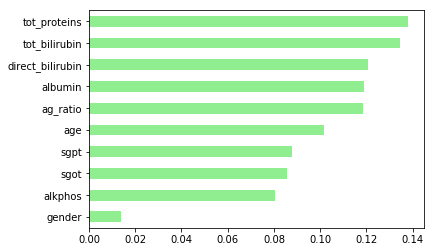

In [92]:
import matplotlib.pyplot as plt

# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_,index = X.columns)

# Sort importances_rf                                   
sorted_importances_rf = importances_rf.sort_values()       


# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh',color='lightgreen') 
plt.show()



## Using Ada Boosting

In [93]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score,roc_curve, auc

In [94]:
# Instantiate a classification-tree 'dt'//we have done this before (dt = DecisionTreeClassifier(max_depth=1,random_state=SEED))

# Instantiate an AdaBoost classifier 'adab_clf'
adb_clf = AdaBoostClassifier(base_estimator=dt,n_estimators=100)

In [95]:
# Fit 'adb_clf' to the training set
adb_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=0.4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.04, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=None)

In [96]:
# Predict the test set probabilities of positive class/ The predicted class probability is the fraction of samples of the same class in a leaf. And the prediction for a random forest is the average on all trees : The predicted class probabilities of an input sample is computed as the mean predicted class probabilities of the trees in the forest
y_pred_proba = adb_clf.predict_proba(X_test)[:,1]
#*we will use ROC to check the accuracy
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred_proba,pos_label=2)
auc_ada_prob= auc(fp_rate, tp_rate,'\n')
print(auc_ada_prob)

0.7754702194357367


In [97]:
y_pred = adb_clf.predict(X_test)
#*we will use ROC to check the accuracy
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred,pos_label=2)
auc_ada= auc(fp_rate, tp_rate,'\n')
print(auc_ada)
# the results was closer to Logistic regression

0.662421630094044


# Gradient Boosting

In [98]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier

In [99]:
gb_grid_params = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [4, 6, 8],
              'min_samples_leaf': [20, 50,100,150],
              'max_features': [1.0, 0.3, 0.1],
              'verbose' : [1,3,5,7]   
              }
print(gb_grid_params)

gb_gs = GradientBoostingClassifier(n_estimators = 200,random_state=SEED)

gb1 = GridSearchCV(gb_gs,gb_grid_params,cv=2,
                               
                               n_jobs=-1);


{'learning_rate': [0.1, 0.05, 0.02, 0.01], 'max_depth': [4, 6, 8], 'min_samples_leaf': [20, 50, 100, 150], 'max_features': [1.0, 0.3, 0.1], 'verbose': [1, 3, 5, 7]}


In [100]:
gb1.fit(X_train, y_train)
# Predict test set labels
y_pred = gb1.predict(X_test)
#*we will use ROC to check the accuracy
gb1.best_estimator_

      Iter       Train Loss   Remaining Time 
         1           1.3150            0.60s
         2           1.2540            0.69s
         3           1.2047            0.59s
         4           1.1577            0.54s
         5           1.1116            0.54s
         6           1.0695            0.52s
         7           1.0295            0.47s
         8           0.9950            0.45s
         9           0.9669            0.44s
        10           0.9430            0.44s
        20           0.7388            0.31s
        30           0.5989            0.24s
        40           0.5028            0.20s
        50           0.4295            0.18s
        60           0.3719            0.16s
        70           0.3238            0.14s
        80           0.2793            0.13s
        90           0.2412            0.11s
       100           0.2129            0.10s
       200           0.0588            0.00s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features=0.3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=20, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=1, subsample=1.0, verbose=1,
              warm_start=False)

In [101]:
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred,pos_label=2)
auc_gb_gs= auc(fp_rate, tp_rate,'\n')
print(auc_gb_gs)
# the results was closer to Logistic regression

0.627742946708464


In [102]:

# Instantiate gb
gb = GradientBoostingClassifier(max_depth=4,n_estimators=200, random_state=SEED)
# Fit gb to the training set
gb.fit(X_train,y_train)

# Predict test set labels
y_pred_gb = gb.predict(X_test)
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred_gb ,pos_label=2)
auc_gb= auc(fp_rate, tp_rate,'\n')
print(auc_gb)
# the results was closer to Logistic regression

0.6622257053291536


In [103]:
gb.get_params()

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'presort': 'auto',
 'random_state': 1,
 'subsample': 1.0,
 'verbose': 0,
 'warm_start': False}